In [1]:
library(tidyverse)
library(ggthemes)
library(odbc)
library(RPostgres) 
library(plutoR)
library(quantmod)
library(PerformanceAnalytics)
library(ggrepel)
library(reshape2)
library(lubridate)

options("scipen"=999)
options(stringsAsFactors = FALSE)
options(repr.plot.width=16, repr.plot.height=8)

source("config.R")
source("goofy/plot.common.R")


indices<-Indices()

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: ‘PerformanceAnalytics’

The following object is masked from

In [2]:
nifty_50 <- indices$NseTimeSeries() %>%
                 filter(NAME == "NIFTY 50") %>%  
                 arrange(TIME_STAMP) %>%
                 collect() 

nifty_auto <- indices$NseTimeSeries() %>%
                 filter(NAME == "NIFTY AUTO") %>%  
                 arrange(TIME_STAMP) %>%
                 collect()

In [3]:
xts1 <- xts(nifty_50$CLOSE, nifty_50$TIME_STAMP)
xts2 <- xts(nifty_auto$CLOSE, nifty_auto$TIME_STAMP)

In [4]:
monthly_prices <- to.monthly(xts1, indexAt="last", OHLC = FALSE)
monthly_prices_auto <- to.monthly(xts2, indexAt="last", OHLC = FALSE)

In [5]:
monthly_returns <- na.omit(Return.calculate(monthly_prices, method = "log"))
monthly_returns_auto <- na.omit(Return.calculate(monthly_prices_auto, method = "log"))
length(monthly_returns)

[1] 350

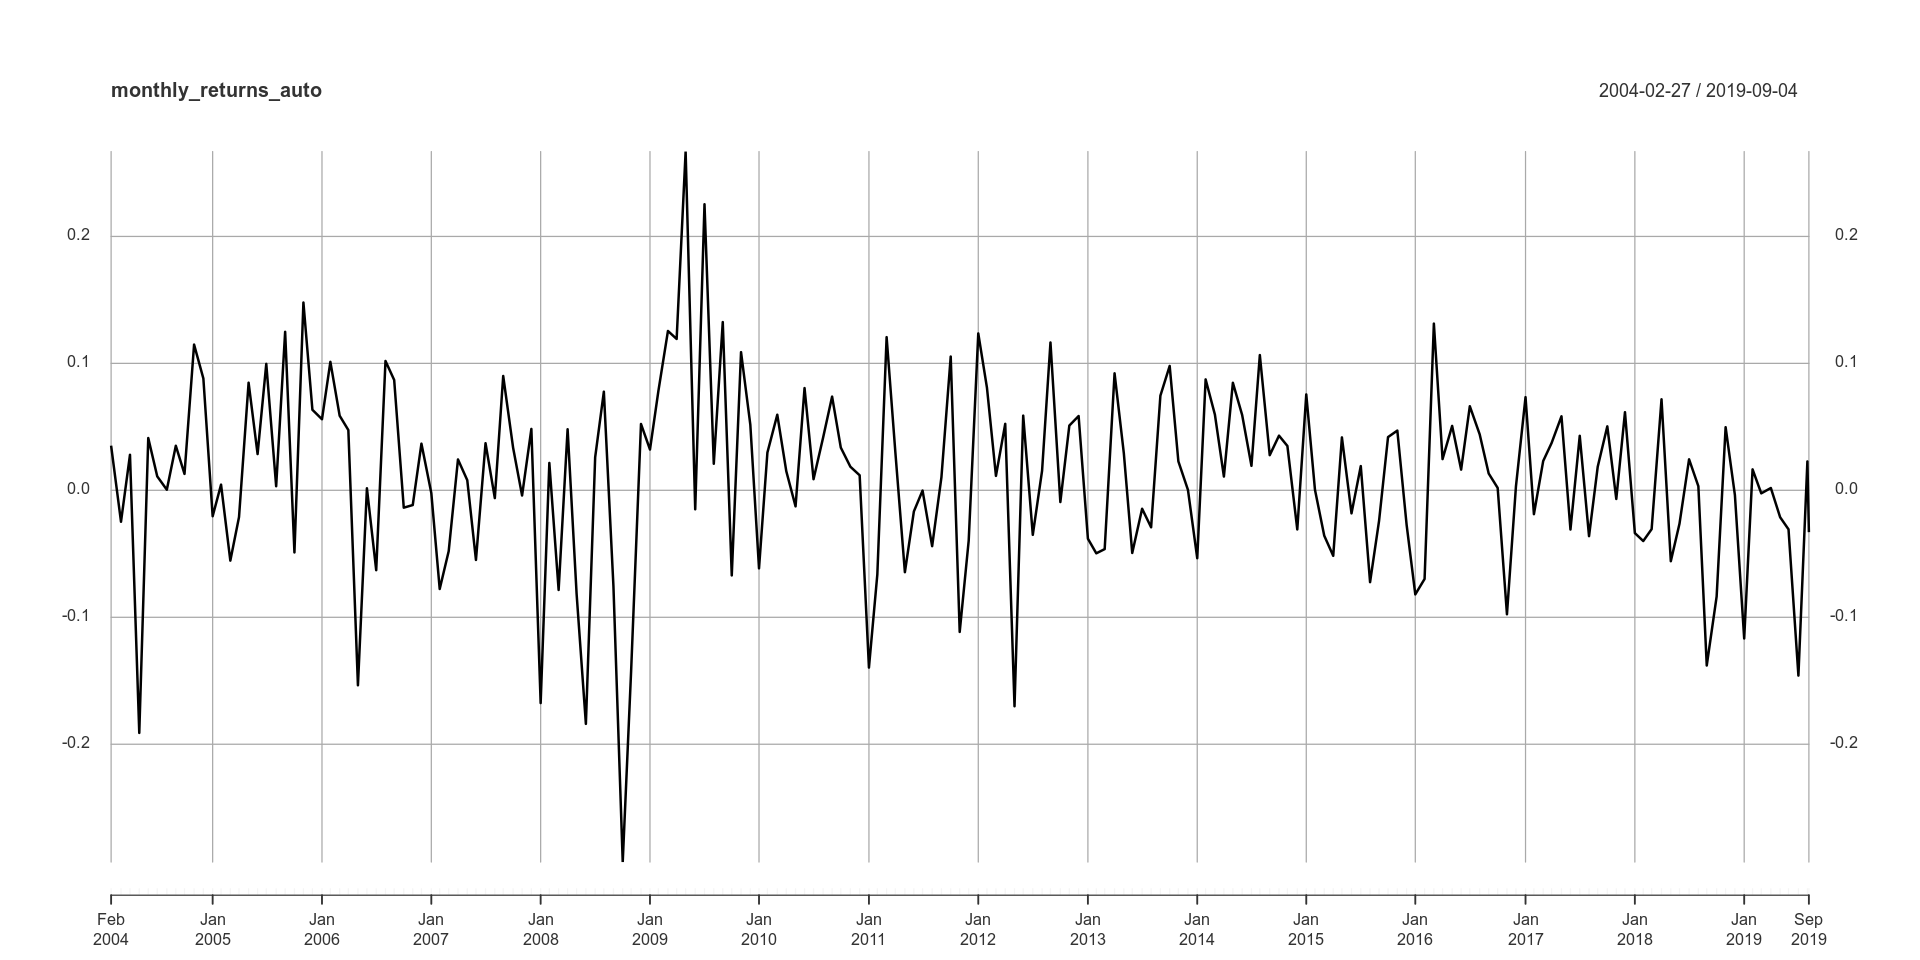

In [6]:
plot(x=monthly_returns_auto,y=NULL) 

This notebook was created using [pluto](http://pluto.studio). Learn more [here](https://github.com/shyams80/pluto)